In [13]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")



*1: Loading and Preprocessing*

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print("Preprocessed DataFrame:")
print(df.head())


Preprocessed DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In the Iris dataset from sklearn, the species column is actually the target variable (iris.target) and isn't included in iris.data by default.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


*2.Clustering Algorithm Implementation *

*A) KMeans Clustering*

KMeans clustering partitions the dataset into K clusters by minimizing the within-cluster sum of squares.
Steps:
        -Initialize K centroids randomly.
        -Assign each data point to the nearest centroid.
        -Recompute centroids based on the mean of assigned points.
        -Repeat until convergence.


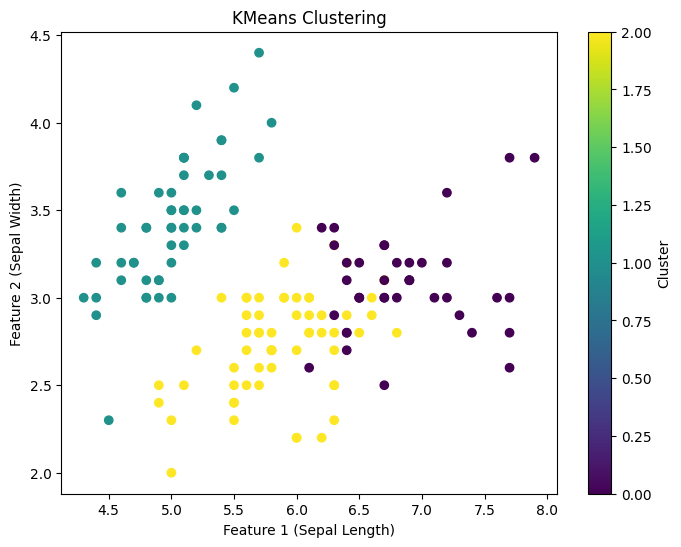

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df)
df['KMeans_Cluster'] = kmeans.labels_

# Visualization 
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['KMeans_Cluster'], cmap='viridis', label='Cluster')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.colorbar(label='Cluster')
plt.show()



Why Suitable for Iris Dataset:

Iris dataset is well-suited for KMeans clustering as it has three naturally occurring species (clusters).
KMeans can identify these groupings based on the features of the flowers.

*B) Hierarchical Clustering*

Hierarchical clustering builds a hierarchy of clusters either by:
    Agglomerative: Starting with individual points and merging them into clusters.
    Divisive: Starting with all points in one cluster and splitting them.
    Results are visualized using a dendrogram.

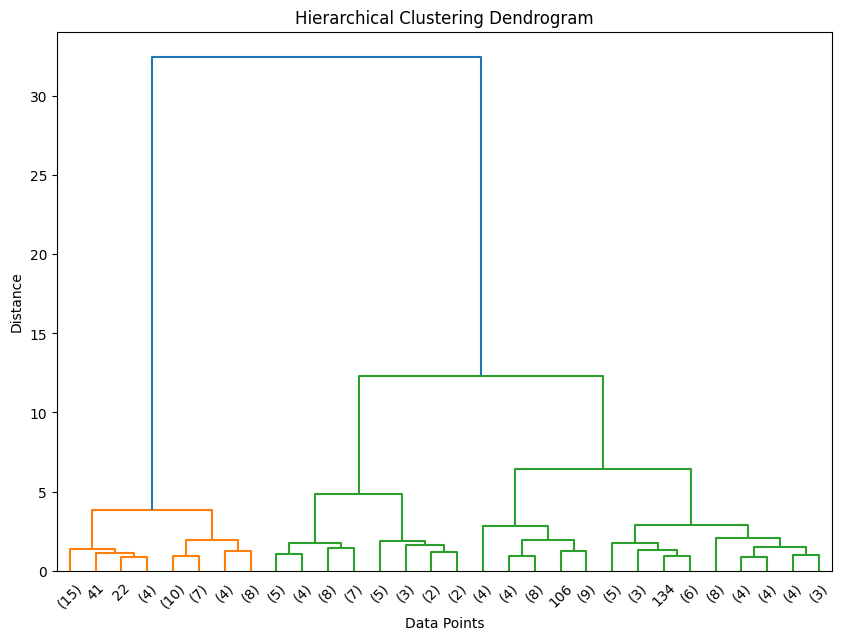

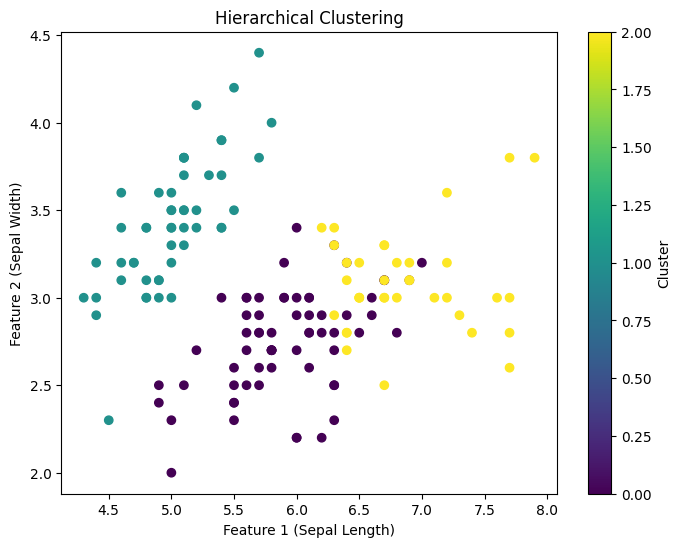

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(df.iloc[:, :-1])

# Plot dendrogram
linked = linkage(df.iloc[:, :-2], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Visualization of clusters
plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Hierarchical_Cluster'], cmap='viridis', label='Cluster')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.colorbar(label='Cluster')
plt.show()


Why Suitable for Iris Dataset:

Iris has natural clusters and hierarchical clustering is ideal for visualizing relationships between clusters using dendrograms.

*Conclusion*
1.Loaded the Iris dataset and preprocessed it by removing the species column.
2. Applied KMeans Clustering (k=3) and visualized the clusters.
3. Applied Hierarchical Clustering and visualized the dendrogram and clusters.

 Results
- **KMeans Clustering**: Successfully grouped data into 3 clusters, which align closely with the actual species.
- **Hierarchical Clustering**: Clearly visualized cluster relationships using a dendrogram and formed 3 clusters.